Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
import datetime

Import Data

In [2]:
customer = pd.read_csv('/content/Case Study - Customer.csv', delimiter = ';')
product = pd.read_csv('/content/Case Study - Product.csv', delimiter = ';')
store = pd.read_csv('/content/Case Study - Store.csv', delimiter = ';')
transaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter = ';')

Data Cleaning

In [3]:
print(customer.isna().sum())
print("")
print(product.isna().sum())
print("")
print(store.isna().sum())
print("")
print(transaction.isna().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

ProductID       0
Product Name    0
Price           0
dtype: int64

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


In [4]:
customer = customer.fillna(method='ffill')

In [5]:
print(customer.isna().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64


In [6]:
print(customer.info())
print(store.info())
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [7]:
customer['Income'] = customer['Income'].str.replace(',', '.')
customer['Income'] = customer['Income'].astype(float)
store['Longitude'] = store['Longitude'].str.replace(',', '.')
store['Longitude'] = store['Longitude'].astype(float)
store['Latitude'] = store['Latitude'].str.replace(',', '.')
store['Latitude'] = store['Latitude'].astype(float)
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

Merging Data (Time Series)

In [8]:
data_time_series = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

In [9]:
data_time_series = pd.merge(left = data_time_series,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

In [10]:
data_time_series = pd.merge(left = data_time_series,
            right = store,
            left_on = 'StoreID',
            right_on = 'StoreID',
            how = 'left')

In [11]:
data_time_series = data_time_series.drop_duplicates()
data_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [12]:
data_time_series.rename(columns = {"Product Name": "ProductName", "Marital Status": "MaritalStatus"}, inplace = True)
data_time_series.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


Exploratory Data Analysis

In [13]:
data_time_series['month'] = data_time_series['Date'].dt.month

In [14]:
# Qty dari per Bulan
data_time_series.groupby('month').agg({'Qty':'sum'})

,Qty
month,
1,1560
2,1441
3,1753
4,1554
5,1589
6,1592
7,1532
8,1492
9,1499


In [15]:
# TotalAmount dari Hari ke Hari
data_time_series.groupby('Date').agg({'TotalAmount':'sum'})

,TotalAmount
Date,
2022-01-01,431200
2022-01-02,613600
2022-01-03,561300
2022-01-04,396500
2022-01-05,273400
...,...
2022-12-27,647300
2022-12-28,599000
2022-12-29,437900


In [16]:
# Jumlah Qty by Product
data_time_series.groupby('ProductName').agg({'Qty':'sum'})

,Qty
ProductName,
Cashew,627
Cheese Stick,1841
Choco Bar,2408
Coffee Candy,2097
Crackers,1824
Ginger Candy,2626
Oat,965
Potato Chip,1092
Thai Tea,2853


In [17]:
# Jumlah TotalAmount berdasarkan StoreName
data_time_series.groupby('StoreName').agg({'TotalAmount':'sum'})

,TotalAmount
StoreName,
Bonafid,11595600
Buana,11332000
Buana Indah,10629900
Gita Ginara,11116100
Harapan Baru,11329500
Lingga,25294100
Prestasi Utama,12285200
Priangan,10995100
Prima Kelapa Dua,12136300


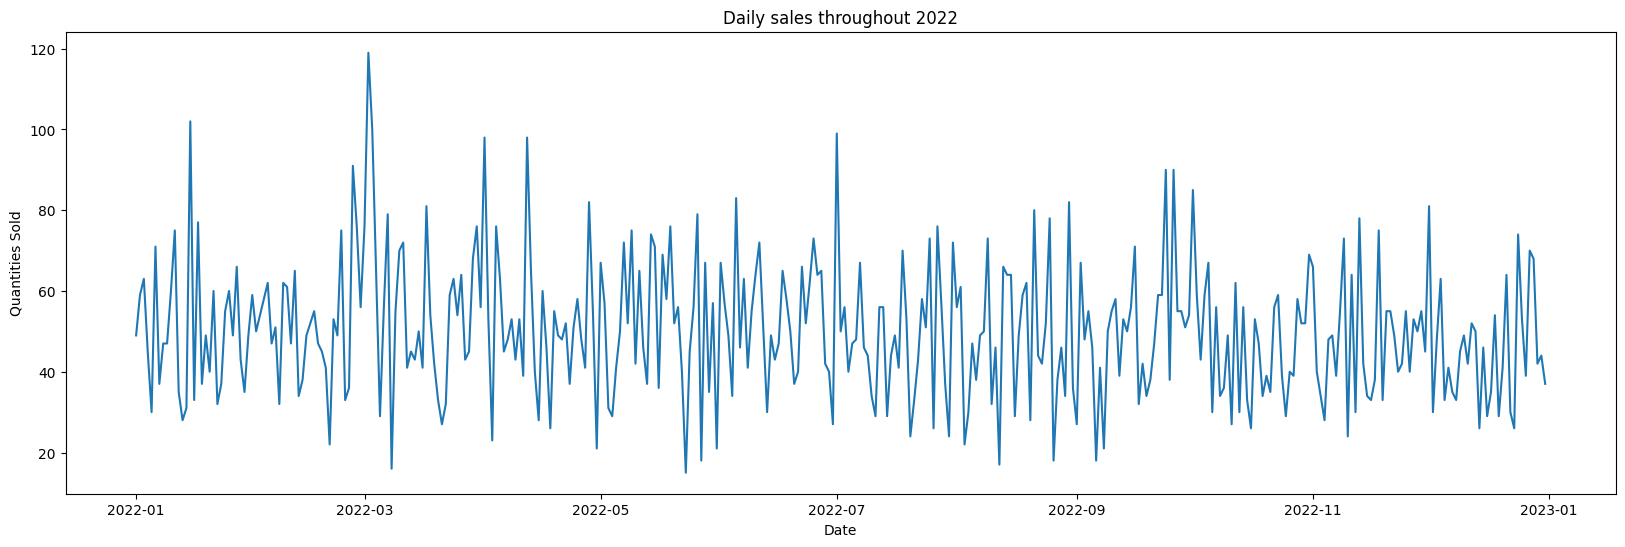

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(data_time_series.groupby('Date').agg({'Qty':'sum'})['Qty'])
plt.xlabel('Date')
plt.ylabel('Quantities Sold')
plt.title('Daily sales throughout 2022')
plt.show()

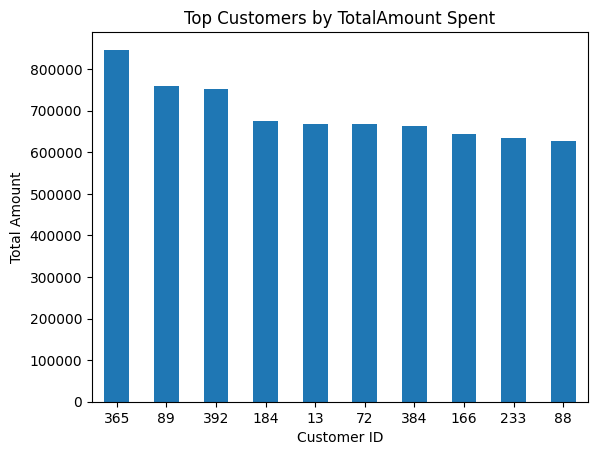

In [19]:
top_customers = data_time_series.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)[:10]
top_customers.plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.title('Top Customers by TotalAmount Spent')
plt.xticks(rotation=0)
plt.show()

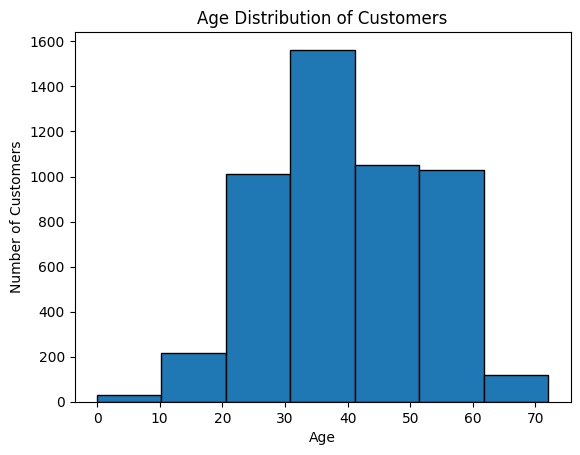

In [20]:
plt.hist(data_time_series['Age'], bins = 7, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.show()

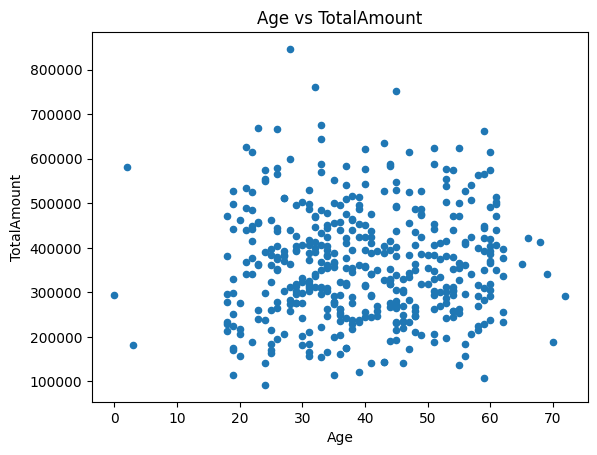

In [21]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')
data_2.plot.scatter(x = "Age", y = "TotalAmount")
data_2
plt.xlabel("Age")
plt.ylabel("TotalAmount")
plt.title("Age vs TotalAmount")
plt.show()

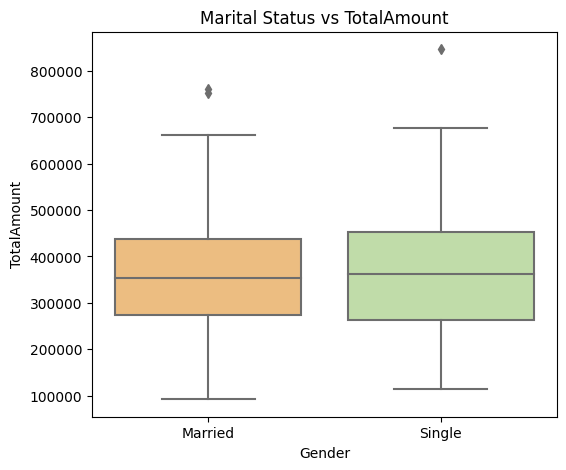

In [22]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
plt.figure(figsize = (6, 5))
sns.boxplot(x = "Marital Status", y = "TotalAmount", data = data_2, palette = 'Spectral')
plt.xlabel("Gender")
plt.ylabel("TotalAmount")
plt.title("Marital Status vs TotalAmount")
plt.show()

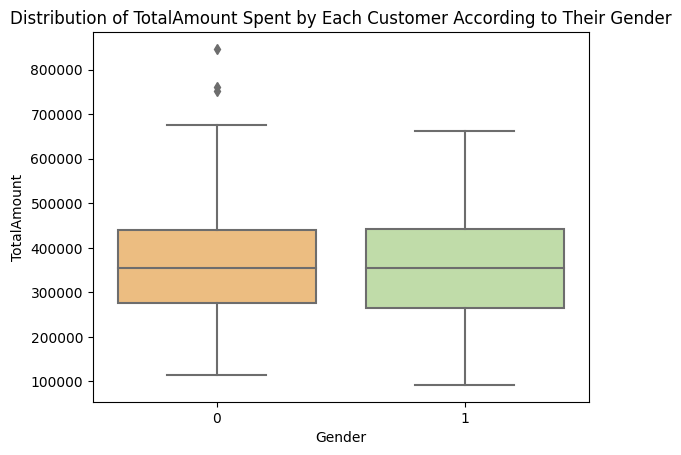

In [23]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
sns.boxplot(x = "Gender", y = "TotalAmount", data = data_2, palette = 'Spectral')
plt.xlabel("Gender")
plt.ylabel("TotalAmount")
plt.title("Distribution of TotalAmount Spent by Each Customer According to Their Gender")
plt.show()

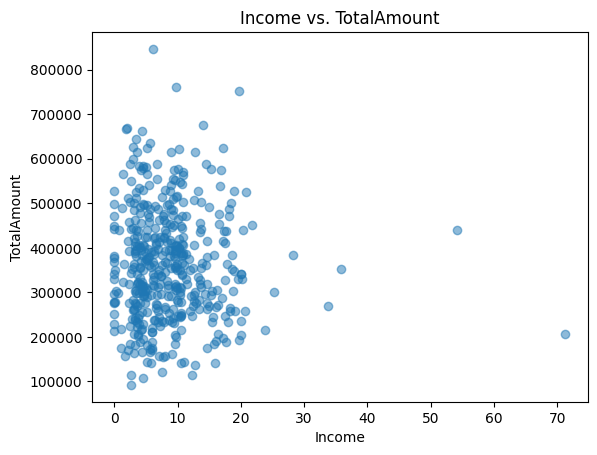

In [24]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
plt.scatter(data_2['Income'], data_2['TotalAmount'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('TotalAmount')
plt.title('Income vs. TotalAmount')
plt.show()

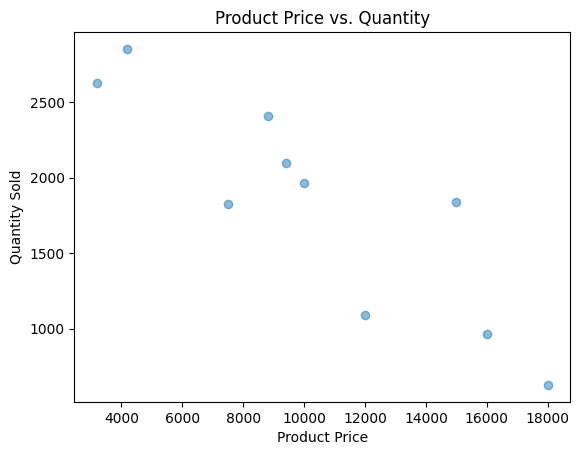

In [25]:
data_1 = data_time_series.groupby('ProductID').agg({'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = product,
                  left_on = 'ProductID',
                  right_on = 'ProductID',
                  how = 'left')
plt.scatter(data_2['Price'], data_2['Qty'], alpha=0.5)
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.title('Product Price vs. Quantity')
plt.show()

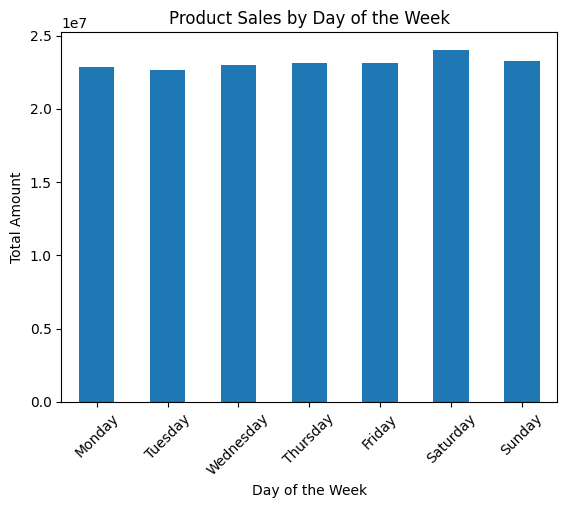

In [26]:
data_time_series['DayOfWeek'] = data_time_series['Date'].dt.day_name()
day_sales = data_time_series.groupby('DayOfWeek')['TotalAmount'].sum()
day_sales = day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sales.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount')
plt.title('Product Sales by Day of the Week')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-519e1fe752ec>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


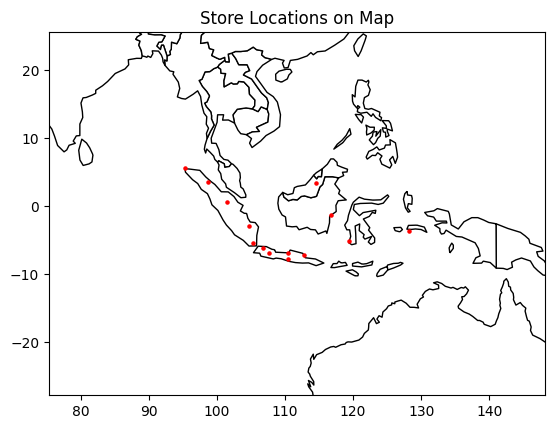

In [27]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(store['Longitude'], store['Latitude'])]
gdf = gpd.GeoDataFrame(store, geometry=geometry)

latitude_range = (min(store['Latitude']) - 20, max(store['Latitude']) + 20)
longitude_range = (min(store['Longitude']) - 20, max(store['Longitude']) + 20)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.title('Store Locations on Map')
plt.xlim(longitude_range)
plt.ylim(latitude_range)
plt.show()

<Figure size 1000x600 with 0 Axes>

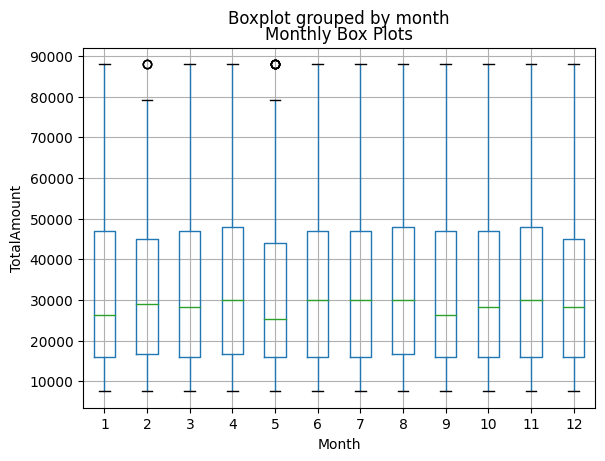

In [28]:
data_1 = data_time_series.copy()
data_1.set_index('Date', inplace=True)

# Create a new column for the month
data_1['month'] = data_1.index.month

# Create box plots for each month
plt.figure(figsize=(10, 6))
data_1.boxplot(column='TotalAmount', by='month')
plt.xlabel('Month')
plt.ylabel('TotalAmount')
plt.title('Monthly Box Plots')
plt.show()

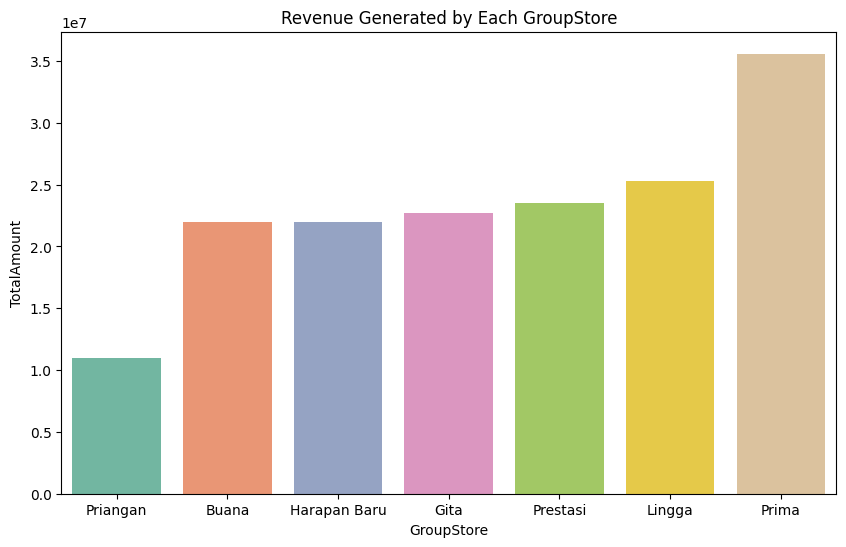

In [29]:
data_1 = data_time_series.groupby('GroupStore').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = store,
                  left_on = 'GroupStore',
                  right_on = 'GroupStore',
                  how = 'left')
data_2 = data_2.sort_values('TotalAmount')
plt.figure(figsize = (10, 6))
sns.barplot(x = "GroupStore", y = "TotalAmount", data = data_2, palette = 'Set2')
plt.xlabel("GroupStore")
plt.ylabel("TotalAmount")
plt.title("Revenue Generated by Each GroupStore")
plt.show()

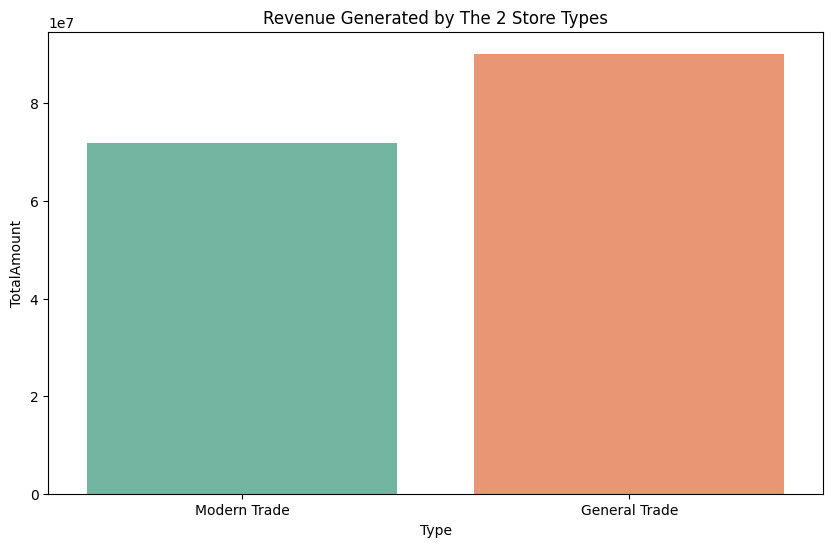

In [30]:
data_1 = data_time_series.groupby('Type').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = store,
                  left_on = 'Type',
                  right_on = 'Type',
                  how = 'left')
data_2 = data_2.sort_values('TotalAmount')
plt.figure(figsize = (10, 6))
sns.barplot(x = "Type", y = "TotalAmount", data = data_2, palette = 'Set2')
plt.xlabel("Type")
plt.ylabel("TotalAmount")
plt.title("Revenue Generated by The 2 Store Types")
plt.show()

<ipython-input-31-109e37a89dca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data_time_series.corr()[['Qty']].sort_values(by = ['Qty'], ascending = False)


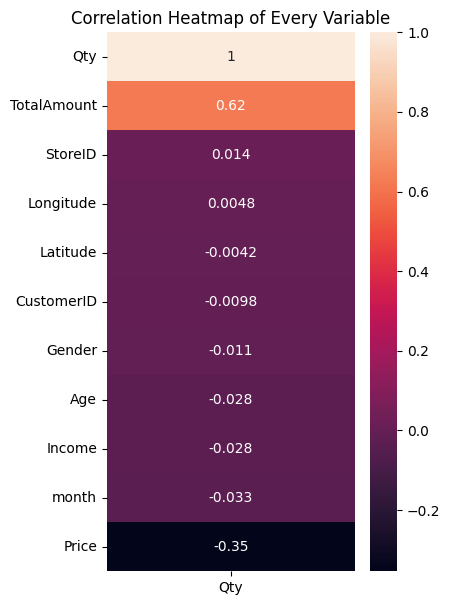

In [31]:
df_corr = data_time_series.corr()[['Qty']].sort_values(by = ['Qty'], ascending = False)
plt.figure(figsize = (4, 7))
sns.heatmap(df_corr, annot = True)
plt.title('Correlation Heatmap of Every Variable')
plt.show()

TIME SERIES

In [32]:
df = data_time_series.copy()

Data Aggregating (Time Series)

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data_qty = df.groupby('Date').agg({'Qty':'sum'})

Check for Stationarity

In [34]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [35]:
ad_test(data_qty['Qty'])

1. ADF:  -19.448086319449082
2. P-Value:  0.0
3. Num of Lags:  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  364
5. Critical Values: 
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


Check for Seasonality

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

Plot Seasonal Decompose, Autocorrelation, and Partial Autocorrelation

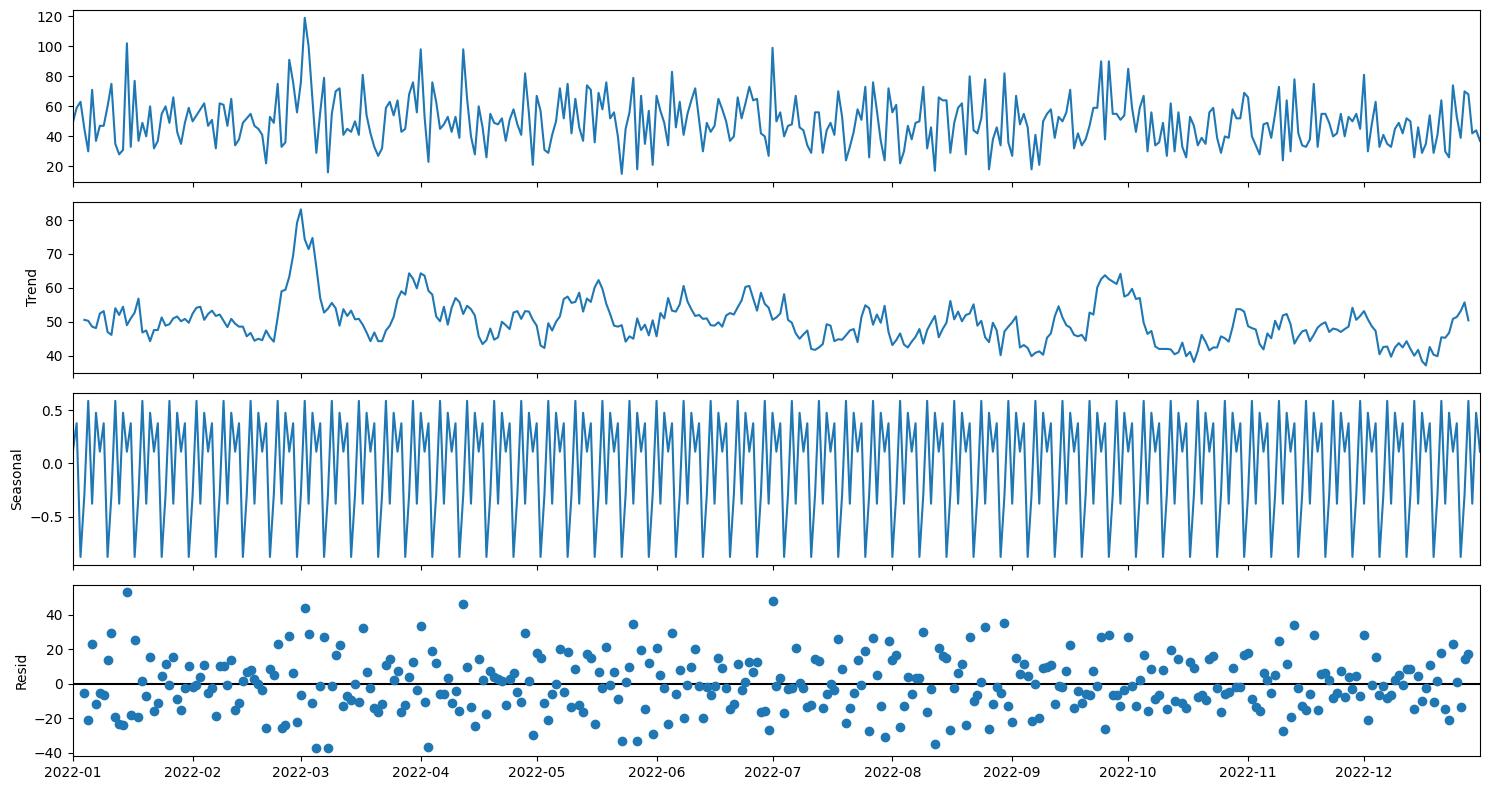

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(data_qty, model='additive')
fig = decomposition.plot()
plt.show()

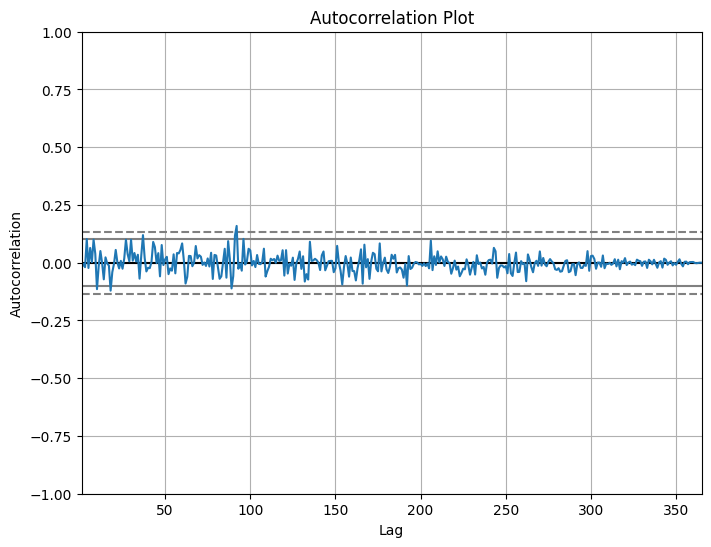

In [38]:
plt.figure(figsize = (8, 6))
pd.plotting.autocorrelation_plot(data_qty['Qty'])
plt.title('Autocorrelation Plot')
plt.show()

<Figure size 800x600 with 0 Axes>

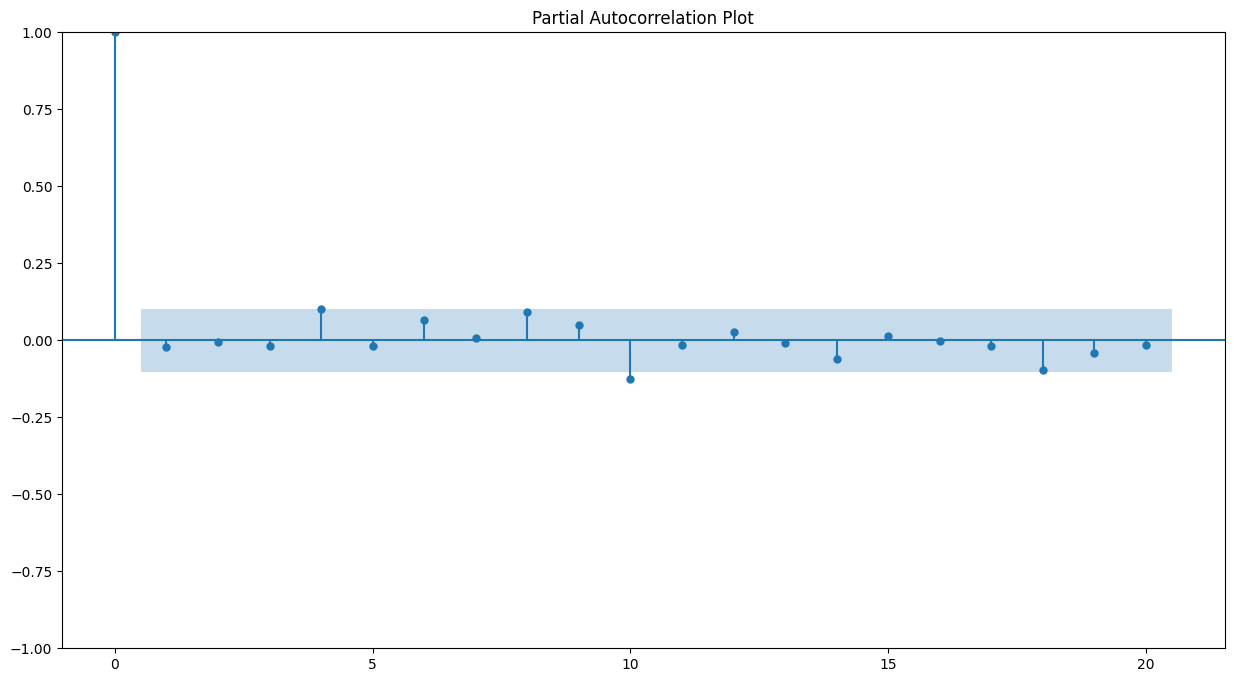

In [39]:
plt.figure(figsize = (8, 6))
plot_pacf(data_qty['Qty'], lags = 20)
plt.title('Partial Autocorrelation Plot')
plt.show()

Split Data

In [40]:
train = data_qty.iloc[:-110]
test = data_qty.iloc[-110:]
len(train)

255

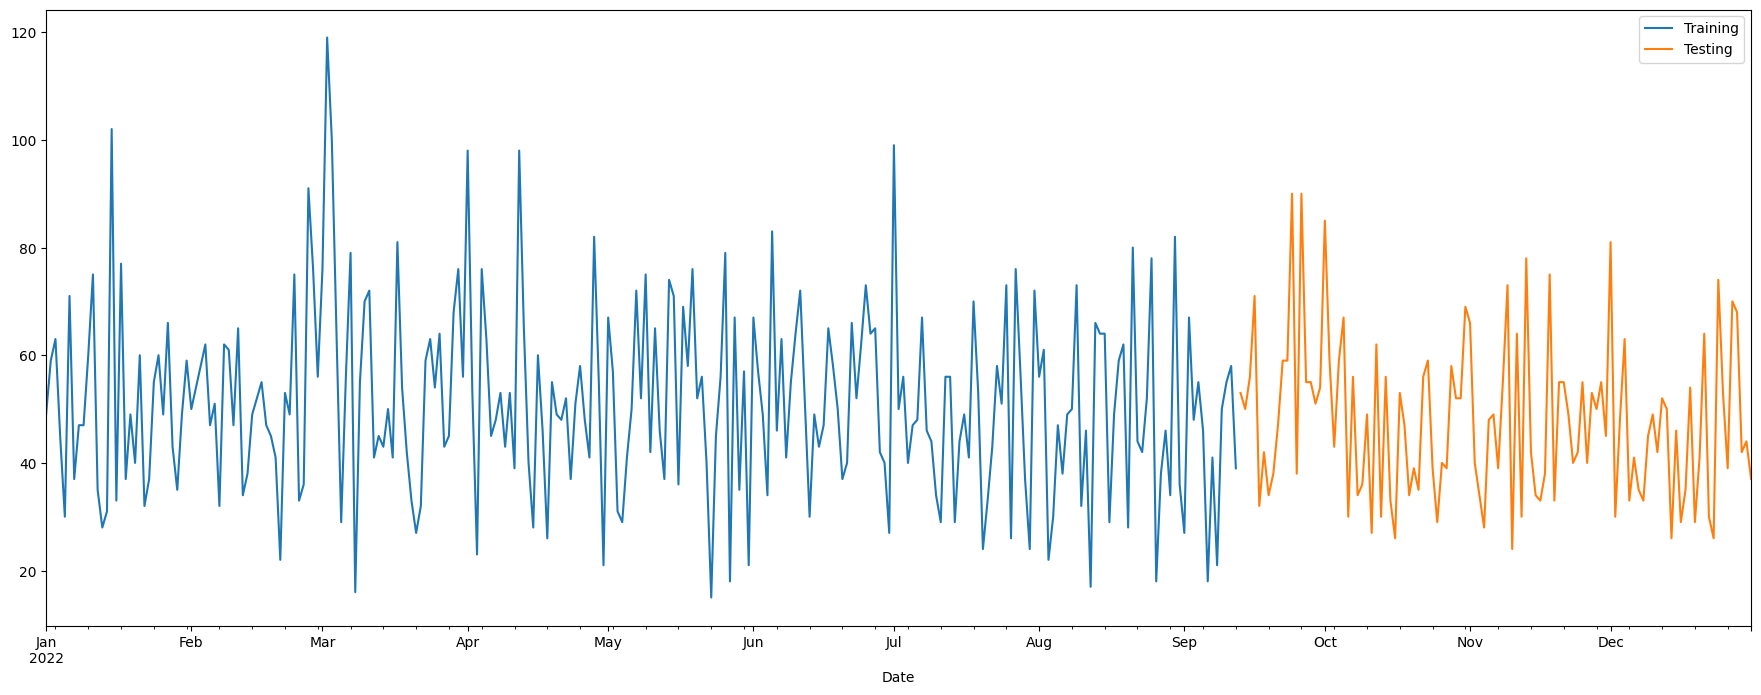

In [41]:
train['Qty'].plot(figsize = (22, 8), legend = True, label = 'Training')
test['Qty'].plot(legend = True, label = 'Testing')
plt.show()

Model Fitting

In [42]:
import statsmodels.api as sm

In [43]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00


In [44]:
from pmdarima import auto_arima

In [45]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [46]:
stepwise_model = auto_arima(train['Qty'], start_p = 1, start_q = 1, max_p = 5,
                            max_q = 5, m = 1, start_P = 0, seasonal = False,
                            d = 1, D = 1, trace = True, error_action = 'ignore',
                            supress_warnings = True, stepwise = True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2356.039, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2290.826, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2354.040, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2266.888, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2228.550, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2225.664, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2210.990, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2208.997, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2223.667, Time=0.38 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2182.888, Time=0.96 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2182.013, T

Predicting Testing Data

In [47]:
predict = stepwise_model.predict(start = len(train),n_periods = len(test))
predict

2022-09-13    52.384491
2022-09-14    46.860517
2022-09-15    52.417990
2022-09-16    47.172493
2022-09-17    50.862382
                ...    
2022-12-27    49.518150
2022-12-28    49.379386
2022-12-29    49.531279
2022-12-30    49.377355
2022-12-31    49.522845
Freq: D, Length: 110, dtype: float64

Plotting Testing Data and Predictions Made by ARIMA

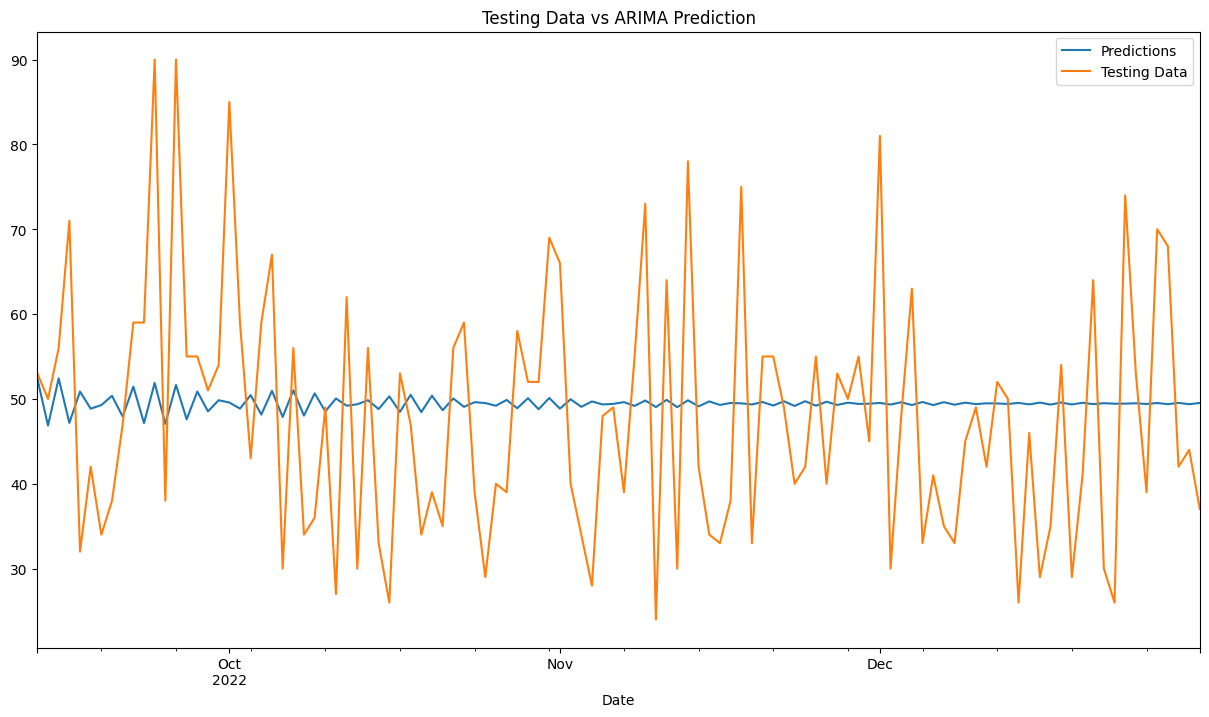

In [48]:
predict.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')
plt.title('Testing Data vs ARIMA Prediction')
plt.show()

<Axes: xlabel='Date'>

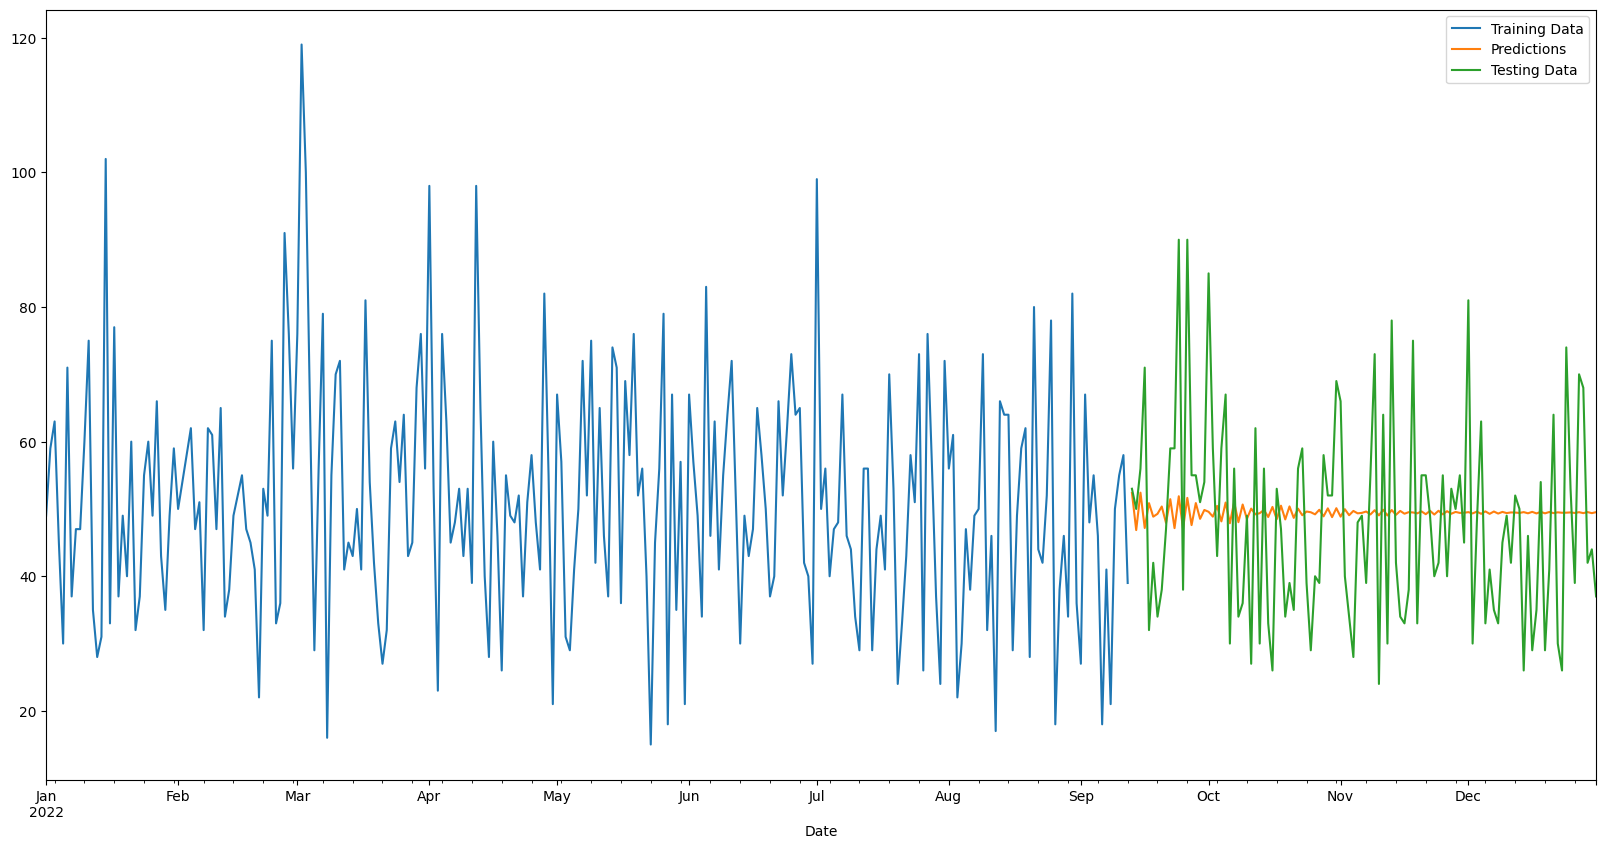

In [72]:
train['Qty'].plot(legend = True, label = 'Training Data', figsize = (20, 10))
predict.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')

Predict Quantities Sold for Future Dates

In [50]:
pred = stepwise_model.predict(n_periods = 190, typ = 'levels').rename('ARIMA Forecast')
pred = pred[110:-49]
pred

2023-01-01    49.394964
2023-01-02    49.497877
2023-01-03    49.425106
2023-01-04    49.464942
2023-01-05    49.458433
2023-01-06    49.433487
2023-01-07    49.486035
2023-01-08    49.411321
2023-01-09    49.501654
2023-01-10    49.402843
2023-01-11    49.502916
2023-01-12    49.408381
2023-01-13    49.491421
2023-01-14    49.424651
2023-01-15    49.471799
2023-01-16    49.446076
2023-01-17    49.450132
2023-01-18    49.466514
2023-01-19    49.432209
2023-01-20    49.480895
2023-01-21    49.422090
2023-01-22    49.486369
2023-01-23    49.421307
2023-01-24    49.482733
2023-01-25    49.428812
2023-01-26    49.472131
2023-01-27    49.441585
2023-01-28    49.458194
2023-01-29    49.455671
2023-01-30    49.444914
2023-01-31    49.467309
Freq: D, Name: ARIMA Forecast, dtype: float64

Plotting Training, Testing Data, Forecast by ARIMA, and ARIMA Predictions on Future Dates

<Axes: xlabel='Date'>

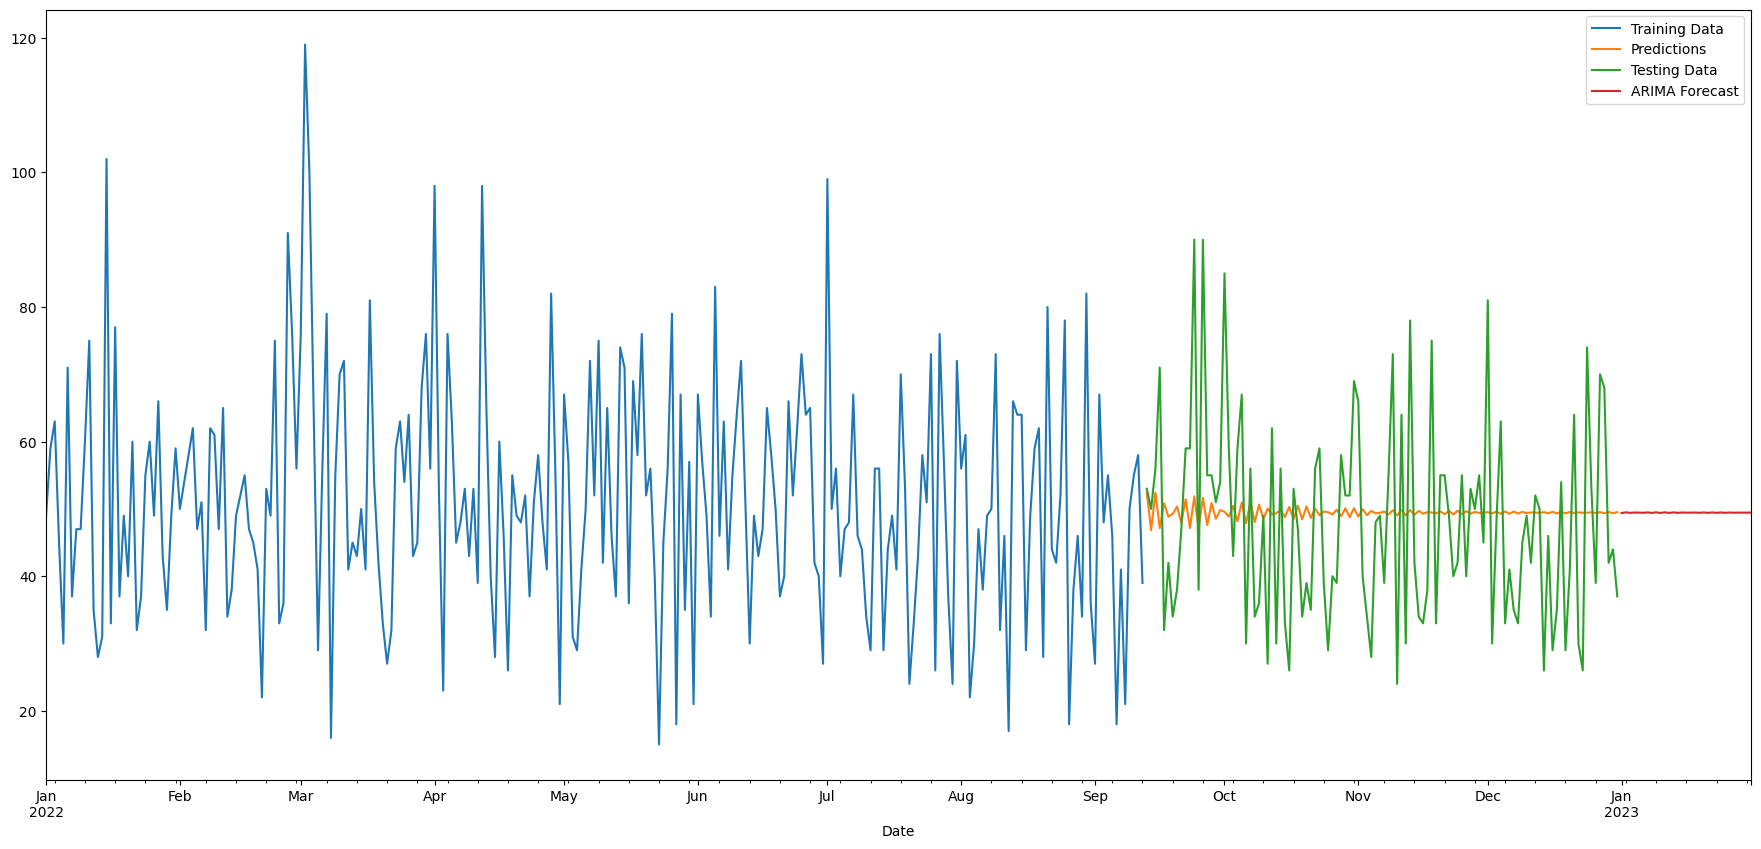

In [51]:
train['Qty'].plot(legend = True, label = 'Training Data', figsize = (22, 10))
predict.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')
pred.plot(legend = True)

Model Evaluation

In [52]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(actual, predicted) -> float:

    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the MAPE value and return
    return round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)
def calculate_explained_variance(y_true, y_pred):
    mean_actual = np.mean(y_true)
    explained_variance = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - mean_actual) ** 2)
    return explained_variance

mape = calculate_mape(test['Qty'], predict)
mae = mean_absolute_error(test['Qty'], predict)
mse = mean_squared_error(test['Qty'], predict)
rmse = np.sqrt(mse)
explained_variance = calculate_explained_variance(test['Qty'], predict)

In [53]:
print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

MAPE: 28.63%
MAE: 12.05
MSE: 216.95
RMSE: 14.73
Explained Variance: 0.00


CLUSTERING

Merging Data (Clustering)

In [54]:
data_clustering = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

In [55]:
data_clustering = pd.merge(left = data_clustering,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

In [56]:
data_clustering = pd.merge(left = data_clustering,
                  right = store,
                  left_on = 'StoreID',
                  right_on = 'StoreID',
                  how = 'left')

In [57]:
data_clustering = data_clustering.drop_duplicates()

Renaming Columns

In [58]:
data_clustering.rename(columns = {"Product Name": "ProductName", "Marital Status": "MaritalStatus"}, inplace = True)
data_clustering.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


Data Aggregating (Clustering)

In [59]:
df = data_clustering.groupby('CustomerID').agg({'TransactionID':'count',
                                                'Qty': 'sum',
                                                'TotalAmount': 'sum'})

In [60]:
df

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


Make Scatter Plot Based on the Aggregated Data

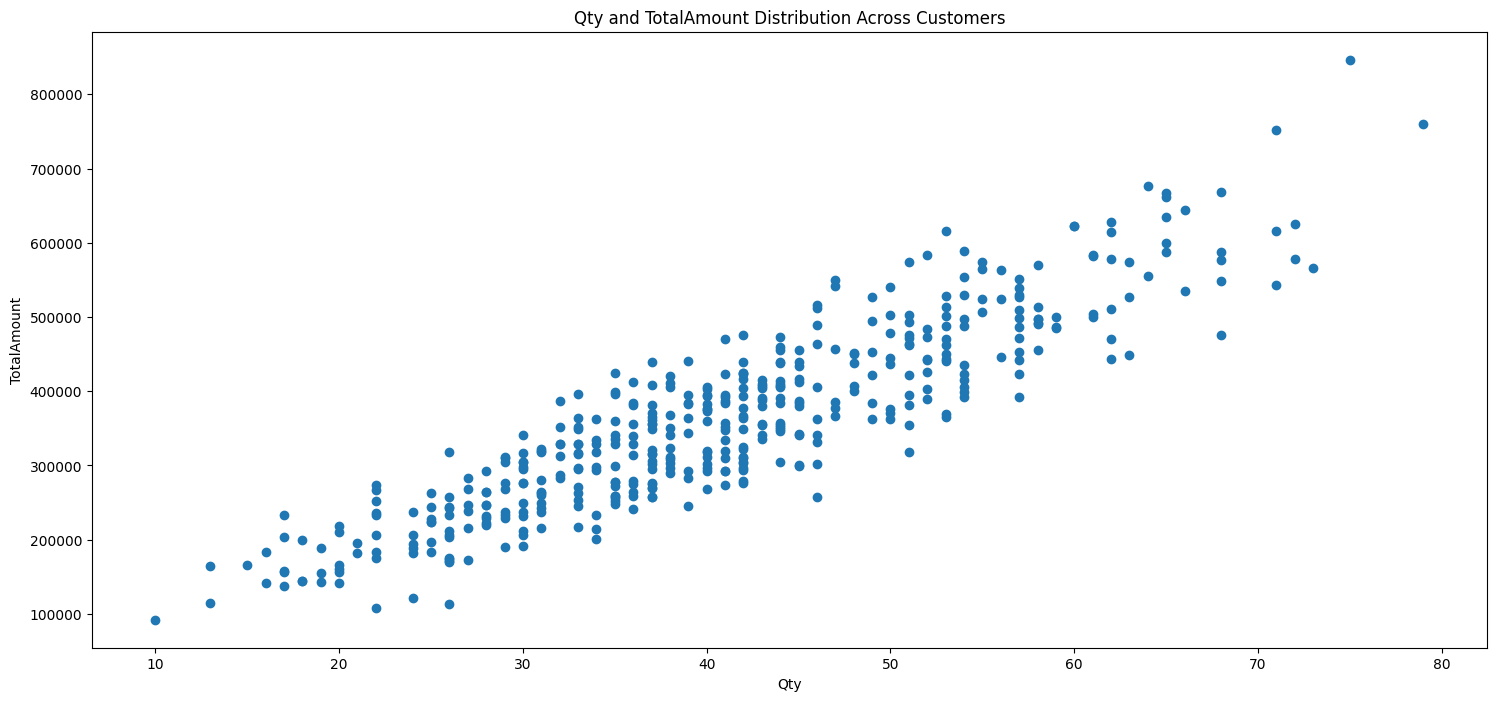

In [73]:
plt.figure(figsize = (18, 8))
plt.scatter(df['Qty'],
            df['TotalAmount'])
plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('Qty and TotalAmount Distribution Across Customers')
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Scale the Data

In [63]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

Find the Right K (Clusters) Using Elbow Method

In [64]:
def find_clusters(df, max_K):
  clusters_centers = []
  k_values = []
  for k in range(1, max_K):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)
  return clusters_centers, k_values
def generate_elbow_plot(clusters_centers, k_values):
  figure = plt.subplots(figsize = (10, 6))
  plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Cluster Inertia')
  plt.title('Elbow Plot of KMeans')
  plt.show()

In [65]:
clusters_centers, k_values = find_clusters(scaled_data, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7db98eb66050>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._h

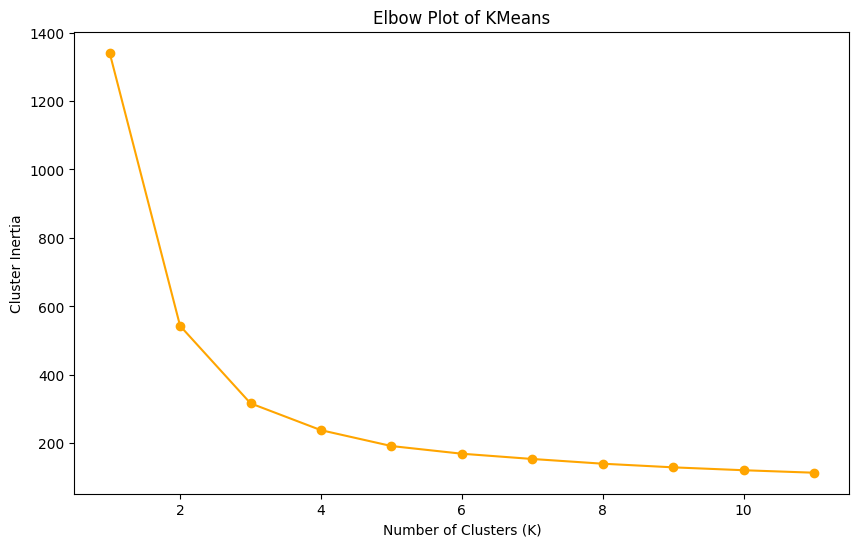

In [66]:
generate_elbow_plot(clusters_centers, k_values)

Model Fitting (Clustering)

In [67]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Add 'Cluster' Column to df

In [68]:
df['Cluster'] = kmeans_model.labels_

In [69]:
df

,TransactionID,Qty,TotalAmount,Cluster
CustomerID,,,,
1,17,60,623300,0
2,13,57,392300,2
3,15,56,446200,2
4,10,46,302500,3
5,7,27,268600,1
...,...,...,...,...
443,16,59,485100,0
444,18,62,577700,0
445,18,68,587200,0


Visualize the Data and Based on Clusters

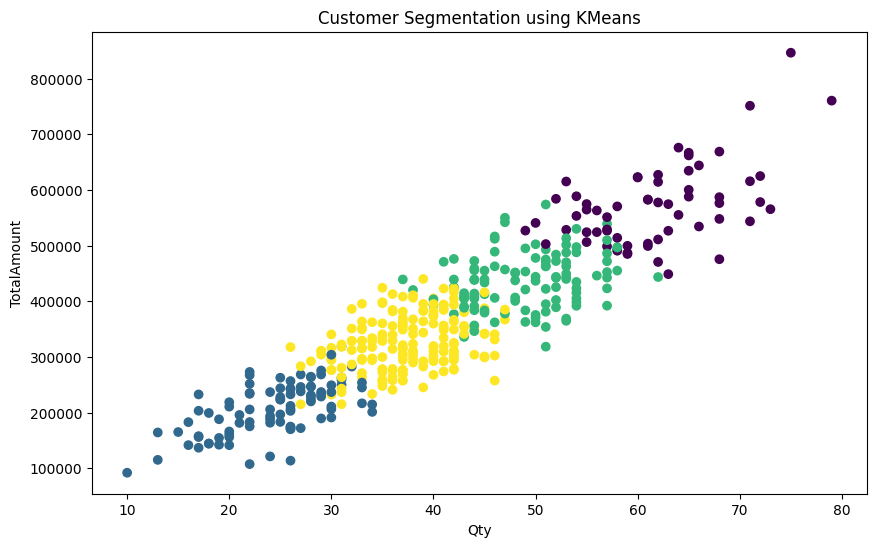

In [70]:
plt.figure(figsize = (10, 6))
plt.scatter(df['Qty'],
            df['TotalAmount'],
            c = df['Cluster'])
plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('Customer Segmentation using KMeans')
plt.show()

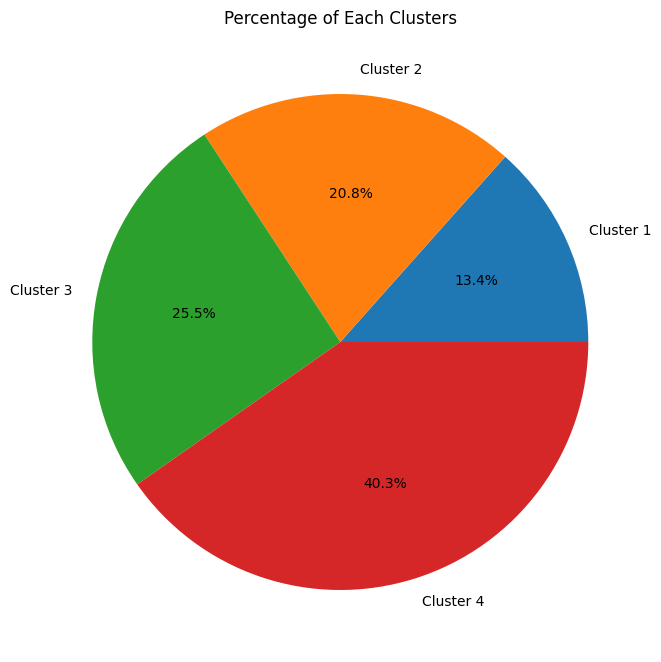

In [71]:
c_1 = df[df["Cluster"] == 0]
c_2 = df[df["Cluster"] == 1]
c_3 = df[df["Cluster"] == 2]
c_4 = df[df["Cluster"] == 3]
rat_1 = (len(c_1)/len(df)) * 100
rat_2 = (len(c_2)/len(df)) * 100
rat_3 = (len(c_3)/len(df)) * 100
rat_4 = (len(c_4)/len(df)) * 100
y = np.array([rat_1, rat_2, rat_3, rat_4])
plt.figure(figsize = (8,10))
mylabels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.title('Percentage of Each Clusters')
plt.show()